# Linear Model
## $\hat{y}=Xw$

: A model that finds the minimum parameter that the square value of the residual can have. (OLS)

- A relationship in which an independent variable affects the dependent variable at a certain rate.


$ Y = w_{1}x_{1}+ w_{2}x_{2} +  ... + w_{n}x_{n} $

$ Y $ : Indepedent variable

$ x_{1}, x_{2}, ... x_{n} $ : Features

$ w_{1}, w_{2}, ...w_{n} $ : parameters



Assumption
- Independent variable is independent.

  If not to be independent, result in Multicollinearity.



## Cost Function  J(x)
: $ y - \hat{y}$

- J(x) = MSE = $ ||y - \hat{y}||^{2}_{2} $
- min $_{w}$ J(x)


Optimization methodology
1. Normal equation
2. Gradient descent

 Normal equation
: Parameter for which the derivative of the cost function is 0

>$ X^{T}XW = X^{T}y $ ,
 If an inverse matrix exists, $ w = (X^{T}X)^{-1}X^{T}y $

> time complexity : $ O(p^{3}) $
- P is Features



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set
seed = 1234
np.random.seed(seed)

w0 = 2.3
w1 = 3.5
num_data = 100
noise = np.random.normal(0, 3, num_data)

# make data
x = np.linspace(0, 10, num_data)
y = w0 + w1*x + noise

# to DF
data = pd.DataFrame(
    {'x':x, 'y':y}
)


data


,x,y
0,0.00000,3.714305
1,0.10101,-0.919392
2,0.20202,7.305192
3,0.30303,2.422650
4,0.40404,1.552375
...,...,...
95,9.59596,35.640017
96,9.69697,35.205096
97,9.79798,38.177794
98,9.89899,33.739498


Text(0, 0.5, 'y')

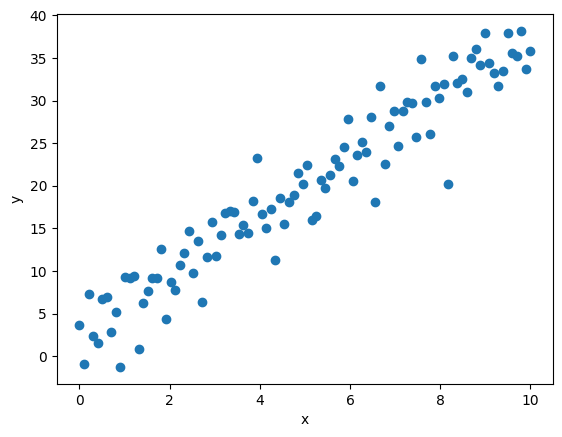

In [5]:
# plot
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')


In [6]:
# to transform
X = np.stack([np.ones_like(x), x], axis=1)
X.shape

(100, 2)

In [20]:
# w = (X^T X)-1 X^T y

def calc_OLS(X, y):
  # linalg : algebra packege
  w_ols = np.linalg.inv(X.T @ X) @ X.T @ y
  return w_ols

w_ols = calc_OLS(X, y)
print("w0 : " , w_ols[0])
print("w1 : " , w_ols[1])
print('-'*50)
print("real w0 : ", w0)
print("real w1 : ", w1)

w0 :  2.508679231829176
w1 :  3.479331523509426
--------------------------------------------------
real w0 :  2.3
real w1 :  3.5


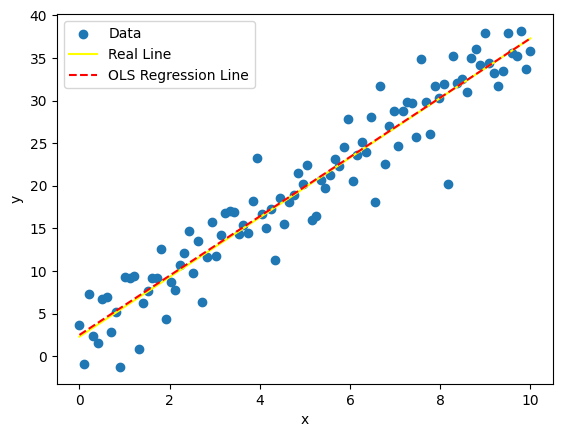

In [8]:
y_real = w0 + w1*x
y_pred_ols = w_ols[0] + w_ols[1]*x

plt.scatter(x, y, label="Data")

plt.plot(x, y_real, color="yellow", label="Real Line")
plt.plot(x, y_pred_ols, color="red", linestyle="--", label="OLS Regression Line")

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

 Gradient Decent
: Method of repeatedly adjusting parameters to minimize the cost function.

> $ J(w) = ||y - \hat{y}||_{2}^{2} = (y - Xw)^{2} $
- $ \frac{\partial}{\partial w} J(w) = 2X^{T}(Xw-y) $
- $ w^{new} = w -lr \frac{\partial}{\partial w} J(w) $

Where
lr is learning rate.


In [13]:
# set
np.random.seed(seed)
lr = 0.0001
epochs = 1000

init_params = np.random.randn(2, 1)
print("Init parameter size : ", init_params.shape)
print("Init parameter : ", 'w0 :', init_params[0][0], "/ w1 : ",
      init_params[1][0])

Init parameter size :  (2, 1)
Init parameter :  w0 : 0.47143516373249306 / w1 :  -1.1909756947064645


In [14]:
def calc_SGD(x, y, lr, epochs, init_params):
  for i in range(epochs):
    y_pred = init_params[0] + init_params[1]*x
    error = y_pred - y

    gradient = 2*X.T @ (X @ init_params - y.reshape(-1, 1))

    init_params -= lr*gradient
  return init_params

w_SGD = calc_SGD(x, y, lr, epochs, init_params)

print("w0 : ", w_SGD[0][0])
print("w1 : ", w_SGD[1][0])
print("-"*50)
print("real w0 : ", w0)
print("real w1 : ", w1)




w0 :  2.499672260902627
w1 :  3.480685813305615
--------------------------------------------------
real w0 :  2.3
real w1 :  3.5


> If there is a lot of data, it takes more time. To solve this, we sample some data and proceed with gradient descent. It calls "Stochastic Gradient Decent(SGD)".

## Multicollinearity
: Occurs when a correlation exists between variables.

- Reduced model stability and interpretability

- may not exist $ (X^{T}X)^{-1} $

## SVD-OLS, Singular Value Decomposition-OLS

> $ X = U\sum V^{T}$

  > $ J(w) = ||y - \hat{y}||^{2}_{2} = || y - Xw||^{2}_{2} =  || y - U \sum V^{T}w||_{2}^{2} $

  > $ w_{SVD - OLS} = V\sum^{-1}U^{T}y $

> time complexity : $ O(np^{2}) $
- P is Features
- n is a number of input data
- generally, n >> p -> take time

> SVD-OLS : Do not compute inverse matrix

In [18]:
# set
num_data = 100
noise = np.random.normal(0, 3, num_data)

w0_col = -0.5
w1_col = 1.8
w2_col = 3.3

# creates data
x1_col = np.linspace(0, 10, num_data)
x2_col = x1_col
y_col = w0_col + w1_col * x1_col + w2_col * x2_col + noise

X_col = np.stack([np.ones_like(x1_col), x1_col, x2_col], axis=1)

#print(np.linalg.inv(X_col.T @ X_col)) - > error !


In [21]:
# SVD-OLS

def calc_SVDOLS(X, y):
  # svd : find U, Sigma, V^T(Vt)
  U, s, Vt = np.linalg.svd(X, full_matrices=False)
  SIGMA = np.diag(s)

  w_svdols = Vt.T @ np.linalg.inv(SIGMA) @ U.T @ y
  return w_svdols

w_svdols = calc_SVDOLS(X, y)
w_ols = calc_OLS(X, y)

print("SVD OLS w0 : ", w_svdols[0])
print("SVD OLS w1 : ", w_svdols[1])
print("-"*50)

print("OLS w0 : ", w_ols[0])
print("OLS w1 : ", w_ols[1])
print("-"*50)

print("real w0 : ", w0)
print("real w1 : ", w1)



SVD OLS w0 :  2.5086792318291633
SVD OLS w1 :  3.4793315235094275
--------------------------------------------------
OLS w0 :  2.508679231829176
OLS w1 :  3.479331523509426
--------------------------------------------------
real w0 :  2.3
real w1 :  3.5


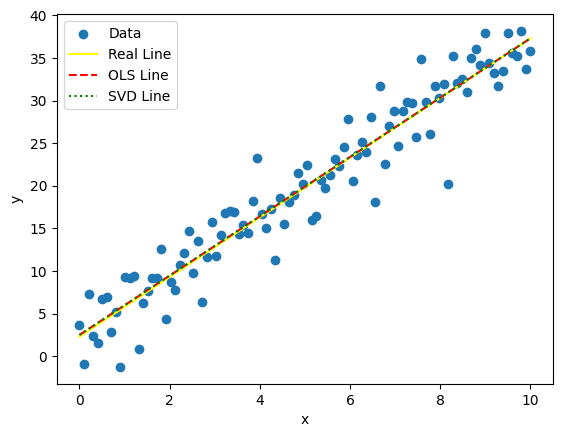

In [25]:
# plot
y_real = w0 + w1 * x
y_pred_ols = w_ols[0] + w_ols[1] * x
y_pred_svdols = w_svdols[0]+  w_svdols[1] * x

plt.scatter(x, y, label="Data")

plt.plot(x, y_real, color="yellow", label="Real Line")
plt.plot(x, y_pred_ols, color="red", linestyle="--", label="OLS Line")
plt.plot(x, y_pred_svdols, color="green", linestyle="dotted", label="SVD Line")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()


In [27]:
# Sklearn
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

print(linear_reg.intercept_)
print(linear_reg.coef_[1])

2.508679231829163
3.4793315235094293


## Regulation
: To solve Over-fitting

- Lasso regression (absolute value, $ l_{1} $ norm) : To make params zero
 > $ J_{Lasso}(w) = ||y - XW||^{2}_{2} + a \sum{||w||_{1}} $
- Ridge regression (sum of squares, $ ㅣ_{2} $ norm) : To not make parmas zero
> $ J_{Ridge}(w) = ||y - XW||^{2}_{2} + a \sum{||w||_{2}^{2}} $

In [29]:
from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print("Lasso : ",  lasso_reg.intercept_, lasso_reg.coef_[1])

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X, y)
print("Ridge : ", ridge_reg.intercept_, ridge_reg.coef_[1])

Lasso :  2.5674911130172795 3.467569147271806
Ridge :  2.510725251490374 3.4789223195771872
